<h1>K-means project-Dni Kukurydzy<h1>

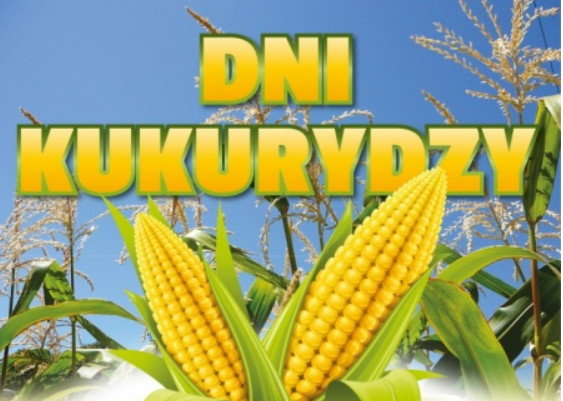

<h2>Opis i cel projektu <h2>

Święto kukurydzy w to coroczny festyn organizowany w gminie Teresin, gdzie zbierają się miłośnicy rolnictwa, dobrej zabawy,
jedzenia oraz muzyki. Podczas tego festynu występuje wiele atrakcji-zazwyczaj zapraszana jest gwiazda wieczoru-jeden z bardziej znanych zespołów disco polo.
Dodatkowo mozna spróbować lokalnych przysmaków,pozwolic dzieciom pójść na plac zabaw, wziąć udział w loterii fantowej(wygraną są m.in wódka,akcesoria rolnicze,wyroby swojskie),
zobaczyć pokaz tegorocznych plonów oraz dowiedzieć się, kto został tegorocznym gospodarzem roku.

W tym projekcie chce postawić się w roli organizatorów festynu i zbadać, kto tak naprawdę przychodzi na festyn.W tym celu
przygotowywałam formularz, załączony w materiałach, który umieściłam na wielu stronach, np"teresin-forum mieszkańców",rozesłałam do swoich
znajomych oraz poprosiłam, by spytali także osoby starsze(swoich rodziców,dziadków), bym miałam pełny przekrój osób.


Na podstawie tych danych pragnę wywnioskować, jakie są wspólne cechy / zachowania w każdym segmencie / klastrze by nastepnie wyobrażając sobie, że jestem
organizatorem festynu, spróbowac przygotowac plan modernizacji tego festiwalu oraz przedstawić wyniki w postaci czytelnego
tematycznego dashboardu,wykonanego w programie POWER BI.

Projekt to mój autorski pomysł.



<h2>1.Uczenie nienadzorowane,algorytm KMEANS -definicja<h2>

Do przeprowadzenia tej analizy używam algorytmu k-means, który jest częścia uczenia nienadzorowanego.Polega ono na tym, że mamy jedynie
dane wejściowe i nie sugerujac nic agorytmowi,uczy sie on na ich podstawie i identyfikuje grupy danych (segmentów / klastrów) 
o podobnych cechach / zachowaniach.

<h2>3.Importowanie pakietów<h2>

W tym projekcie uzywam głównie pakietu pandas,numpy(do przetwarzania danych),matplotlib(wykresy) oraz sklearn który służy do
zaimplementowania algorytmu ML.

In [106]:

import os 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

from sklearn.cluster import KMeans, k_means

%matplotlib inline


np.set_printoptions(formatter={'float_kind':'{:f}'.format})


sns.set(rc={'figure.figsize':(8,6)})


<h2>Wczytywanie danych <h2>

Dane zamiesciłam w moim repozytorium. 

In [107]:

df=pd.read_csv(r"kukurydza.csv", encoding='latin-1')

df

,Przedzial_wiekowy,Plec,Status_zwiazku,Roczne_dochody _w_zlotowkach,Status_zawodowy,Rodzaj_pracy,Wyksztalcenie,Liczba_odwiedzin_swieta_kukurydzy,Akceptowalna_dlugosc_podrozy,Zainteresowanie_zagadnieniami_uprawy_kukurydzy,Zadowolenie_z_ostatniego_festiwalu,Czy_strefy_z_zywnoscia_wiejska_oraz_lokalnymi_nalewkami_sa_dla_ciebie_ciekawe?,Czy_polecilbys_uczestnictwo_innym?,Czy_pieniadze_byly _warte_wydania?,Ulubiona_atrakcja_z_ponizszych,Czy_jestes_rolnikiem?,Unnamed: 16
0,18-30,Kobieta,W zwiazku partnerskim,"50000-74999,999",pracownik pelnoetatowy,umyslowo,wyzsze,5 razy lub wiecej,1 godzine,jest mi to obojetne,zdecydowanie tak,zdecydowanie tak,zdecydowanie tak,zdecydowanie tak,wystep gwiazdy disco polo,nie,NaN
1,18-30,Kobieta,Zamezna/zonaty z dziecmi,<20000,bezrobotny,fizycznie,zawodowe,5 razy lub wiecej,mniej niz godzine,zdecydowanie tak,zdecydowanie tak,raczej nie,zdecydowanie tak,w wiekszosci tak,wystep gwiazdy disco polo,tak,NaN
2,61-70,Kobieta,Wdowa/wiec,<20000,emeryt,fizycznie,zawodowe,5 razy lub wiecej,mniej niz godzine,zdecydowanie tak,zdecydowanie tak,zdecydowanie tak,zdecydowanie tak,zdecydowanie tak,degustacja swojskiej kielbasy,tak,NaN
3,30-40,Mezczyzna,W zwiazku partnerskim,>100000,pracownik pelnoetatowy,umyslowo,wyzsze,1 raz,2 godziny,jest mi to obojetne,w wiekszosci tak,zdecydowanie tak,w wiekszosci tak,raczej tak,przejazd kombajnem,nie,NaN
4,30-40,Kobieta,W zwiazku partnerskim,>100000,pracownik pelnoetatowy,umyslowo,wyzsze,1 raz,1 godzine,zdecydowanie nie,raczej tak,raczej tak,raczej tak,w wiekszosci tak,coroczny pokaz plonów,nie,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,18-30,Kobieta,Singiel/ka,<20000,uczen,fizycznie,podstawowe,2 razy,1 godzine,raczej tak,zdecydowanie tak,raczej tak,zdecydowanie tak,w wiekszosci tak,wystep gwiazdy disco polo,nie,NaN
814,18-30,Mezczyzna,Singiel/ka,"36000-49999,999",pracownik pelnoetatowy,umyslowo,wyzsze,2 razy,1 godzine,zdecydowanie tak,zdecydowanie tak,zdecydowanie tak,raczej tak,w wiekszosci tak,wystep gwiazdy disco polo,nie,NaN
815,18-30,Kobieta,W zwiazku partnerskim,"20000-35999,999",pracownik pelnoetatowy,umyslowo,srednie,1 raz,mniej niz godzine,jest mi to obojetne,raczej tak,zdecydowanie tak,jest mi to obojetne,raczej tak,wesole miasteczko dla dzieci,nie,NaN
816,30-40,Kobieta,W zwiazku partnerskim,"36000-49999,999",pracownik pelnoetatowy,umyslowo,zawodowe,2 razy,1 godzine,jest mi to obojetne,zdecydowanie tak,zdecydowanie tak,raczej tak,zdecydowanie tak,wesole miasteczko dla dzieci,nie,NaN


<h2>czyszczenie danych oraz EDA<h2>

<h3>1.Tradycyjnie należy sprawdzić, czy nie ma żadnych wartości zerowych<h3>

In [108]:
df.isnull().sum()

Przedzial_wiekowy                                                                   0
Plec                                                                                0
Status_zwiazku                                                                      0
Roczne_dochody _w_zlotowkach                                                        0
Status_zawodowy                                                                     0
Rodzaj_pracy                                                                        0
Wyksztalcenie                                                                       0
Liczba_odwiedzin_swieta_kukurydzy                                                   0
Akceptowalna_dlugosc_podrozy                                                        0
Zainteresowanie_zagadnieniami_uprawy_kukurydzy                                      0
Zadowolenie_z_ostatniego_festiwalu                                                  0
Czy_strefy_z_zywnoscia_wiejska_oraz_lokalnymi_nalewkam

Widzimy ze sa takie wartosci wiec zdecyduje sie usunac te wiersze z naszego datasetu

<h3>Wybadanie danych<h3>

Teraz zajmiemy sie zbadaniem danych czyli po prostu wyswietlimy ile poszczegolnych  wartości było i jesli bylo<10 to pokazemy je tu

In [109]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('Liczba unikalnych wartości dla cechy(kolumny) {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('Liczba unikalnych wartości dla cechy(kolumny) {} :{}'.format(column, nr_values))

Liczba unikalnych wartości dla cechy(kolumny) Przedzial_wiekowy :6 -- ['18-30' '30-40' '41-50' '51-60' '61-70' '70 lub wiecej']
Liczba unikalnych wartości dla cechy(kolumny) Plec :2 -- ['Kobieta' 'Mezczyzna']
Liczba unikalnych wartości dla cechy(kolumny) Status_zwiazku :6 -- ['Rozwiedziona/y' 'Singiel/ka' 'W zwiazku partnerskim' 'Wdowa/wiec'
 'Zamezna/zonaty bez dzieci' 'Zamezna/zonaty z dziecmi']
Liczba unikalnych wartości dla cechy(kolumny) Roczne_dochody _w_zlotowkach  :5 -- ['20000-35999,999' '36000-49999,999' '50000-74999,999' '<20000' '>100000']
Liczba unikalnych wartości dla cechy(kolumny) Status_zawodowy :5 -- ['bezrobotny' 'emeryt' 'pracownik niepelnoetatowy'
 'pracownik pelnoetatowy' 'uczen']
Liczba unikalnych wartości dla cechy(kolumny) Rodzaj_pracy :2 -- ['fizycznie' 'umyslowo']
Liczba unikalnych wartości dla cechy(kolumny) Wyksztalcenie :4 -- ['podstawowe' 'srednie' 'wyzsze' 'zawodowe']
Liczba unikalnych wartości dla cechy(kolumny) Liczba_odwiedzin_swieta_kukurydzy :5 -- [

<h3>A jakie mamy kolumny w tym df?Zobaczmy<h3>

In [110]:
df.columns

Index(['Przedzial_wiekowy', 'Plec', 'Status_zwiazku',
       'Roczne_dochody _w_zlotowkach ', 'Status_zawodowy', 'Rodzaj_pracy',
       'Wyksztalcenie', 'Liczba_odwiedzin_swieta_kukurydzy',
       'Akceptowalna_dlugosc_podrozy',
       'Zainteresowanie_zagadnieniami_uprawy_kukurydzy',
       'Zadowolenie_z_ostatniego_festiwalu',
       'Czy_strefy_z_zywnoscia_wiejska_oraz_lokalnymi_nalewkami_sa_dla_ciebie_ciekawe?',
       'Czy_polecilbys_uczestnictwo_innym?',
       'Czy_pieniadze_byly _warte_wydania?', 'Ulubiona_atrakcja_z_ponizszych',
       'Czy_jestes_rolnikiem?', 'Unnamed: 16'],
      dtype='object')

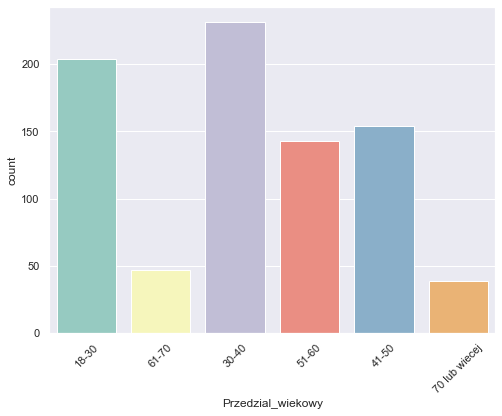

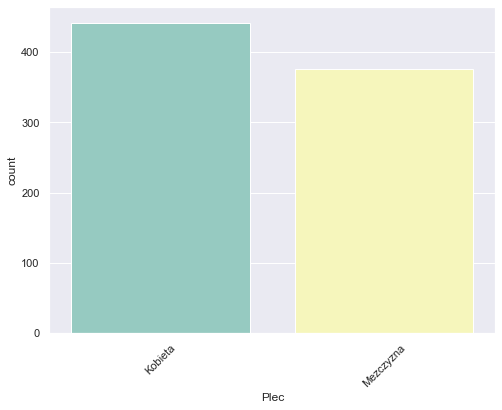

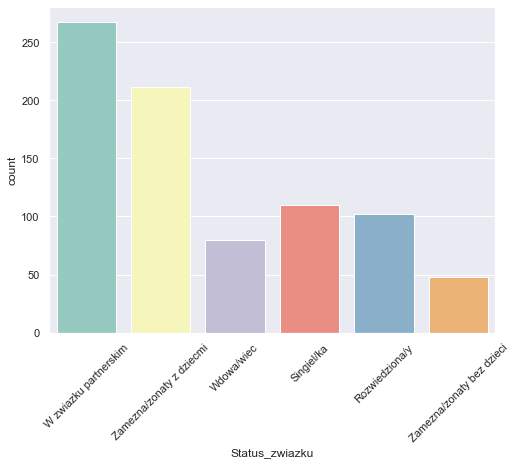

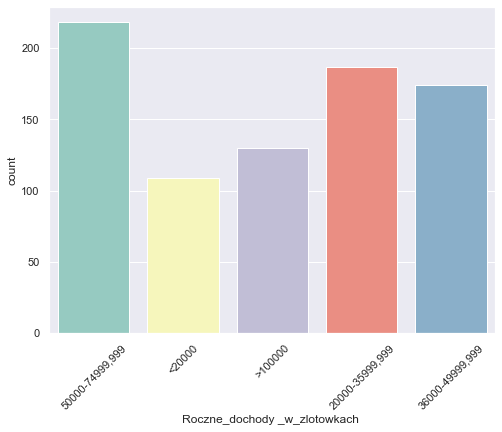

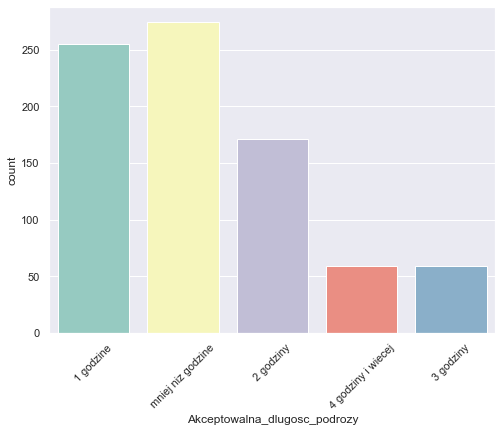

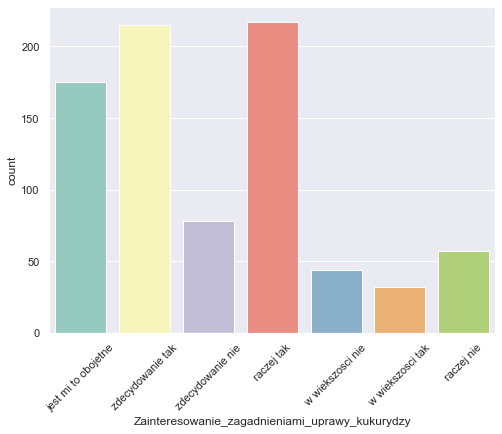

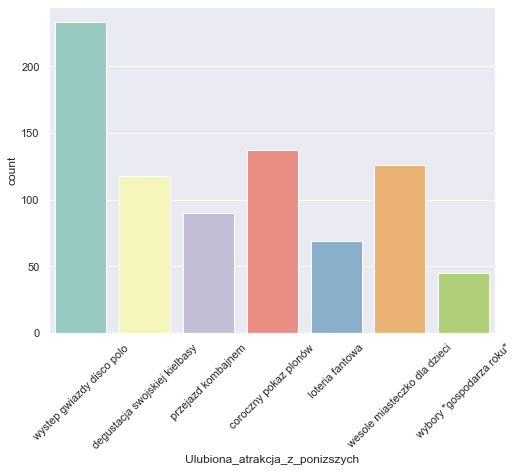

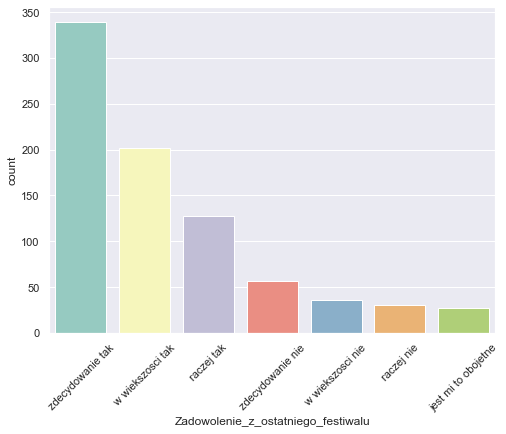

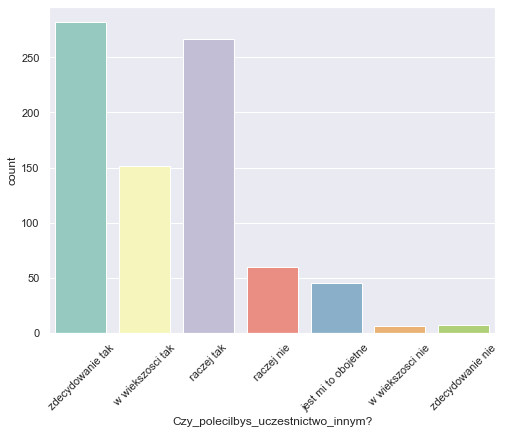

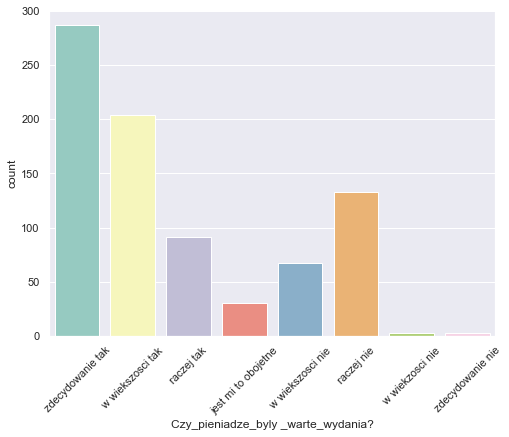

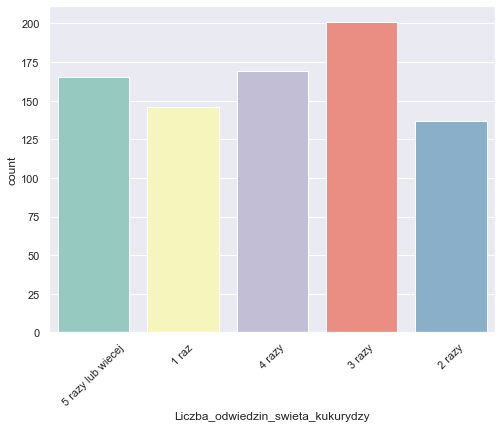

In [111]:
features = ['Przedzial_wiekowy', 'Plec', 
       'Status_zwiazku', 'Roczne_dochody _w_zlotowkach ',
       'Akceptowalna_dlugosc_podrozy',
       'Zainteresowanie_zagadnieniami_uprawy_kukurydzy',
       'Ulubiona_atrakcja_z_ponizszych','Zadowolenie_z_ostatniego_festiwalu',
       'Czy_polecilbys_uczestnictwo_innym?',
       'Czy_pieniadze_byly _warte_wydania?','Liczba_odwiedzin_swieta_kukurydzy']

for f in features:
    sns.countplot(x = f, data = df, palette = 'Set3')
    plt.xticks(rotation=45)
    plt.show()

Poniewaz nie wszystkie nasze dane sa numeryczne, zbudowalismy countploty>przechodzimy przez kazda kolumne i patrzymy ile elementow bylo
w kolumnie dla kazdej cechy.Oczywiscie z kolumn wykluczam te ktore maja ogromna ilosc unikatowych wartosci, bo wykres nic by nam nie powiedzial
oi byl bardzo nieczytelny a wiec kolumny:klient.

<h3>Zamiana zmiennych kategorycznych na numeryczne<h3>

In [112]:
print(df.shape)

# zachowując tylko kolumny, których potrzebujemy
raw_data = df[features]
print(raw_data.shape)

# przekształcanie zmiennych kategorycznych w numeryczne
new_raw_data = pd.get_dummies(raw_data, columns = features)


print(new_raw_data.shape)


new_raw_data.head()

(818, 17)
(818, 11)
(818, 65)


,Przedzial_wiekowy_18-30,Przedzial_wiekowy_30-40,Przedzial_wiekowy_41-50,Przedzial_wiekowy_51-60,Przedzial_wiekowy_61-70,Przedzial_wiekowy_70 lub wiecej,Plec_Kobieta,Plec_Mezczyzna,Status_zwiazku_Rozwiedziona/y,Status_zwiazku_Singiel/ka,...,Czy_pieniadze_byly _warte_wydania?_w wiekszosci nie,Czy_pieniadze_byly _warte_wydania?_w wiekszosci tak,Czy_pieniadze_byly _warte_wydania?_w wiekzosci nie,Czy_pieniadze_byly _warte_wydania?_zdecydowanie nie,Czy_pieniadze_byly _warte_wydania?_zdecydowanie tak,Liczba_odwiedzin_swieta_kukurydzy_1 raz,Liczba_odwiedzin_swieta_kukurydzy_2 razy,Liczba_odwiedzin_swieta_kukurydzy_3 razy,Liczba_odwiedzin_swieta_kukurydzy_4 razy,Liczba_odwiedzin_swieta_kukurydzy_5 razy lub wiecej
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


Teraz mamy wiecej kolumn."Rozplaszcztylismy" nasza kolumne tak ze dla kazdej kategorii kolumny odpowiada na pytanie tak czy nie i odpowiednio
znajduja sie w niej liczby 0 lub 1.

<h2>Przejdzmy teraz do najważniejszej części-wyjaśnienie k-means clustering i zastosowanie go <h2>

*Jest to algorytm ML bez nadzoru.
*Służy do identyfikacji grup danych o podobnej  charakterystyce 

Co to jest i jak dziala-wyjasnienie dac

In [113]:
#KMEANS

X_train = new_raw_data.values

#Zaczniemy z 5 klastrami ki zobaczymy czy to jest ok

kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(X_train)

# Wypisuje klastry przypisane do każdej obserwacji
print("The clusters are: ", kmeans.labels_)

#Bezwładność
print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [1 1 1 0 4 3 2 4 3 1 2 0 1 1 3 3 0 2 1 0 1 3 0 0 0 1 0 0 2 3 2 1 1 0 1 3 0
 0 1 2 1 1 0 0 0 0 2 0 1 4 0 0 0 0 1 1 0 3 1 0 1 0 0 2 2 0 1 1 3 1 4 3 1 3
 0 0 3 3 0 0 1 1 1 0 3 1 2 1 1 0 0 0 3 3 3 0 4 1 0 3 1 1 1 1 1 3 0 2 1 0 0
 3 1 0 1 1 0 0 0 3 3 3 0 4 1 4 3 1 3 0 0 3 3 0 1 0 4 3 2 4 3 1 2 0 1 1 3 0
 0 0 1 0 0 2 1 3 0 0 0 1 0 0 2 3 2 1 1 0 1 3 0 0 1 2 1 1 0 0 0 0 0 2 4 3 1
 2 0 1 1 3 3 0 2 1 0 2 1 2 1 0 2 4 3 1 2 0 1 2 1 0 2 4 3 1 2 0 1 2 0 1 3 0
 0 1 1 1 1 0 4 3 2 4 3 2 4 3 1 2 0 1 2 1 0 2 4 3 1 2 0 1 2 0 1 3 0 0 1 1 1
 1 0 4 3 2 4 3 2 4 3 1 2 0 1 2 1 0 2 4 3 1 2 0 1 2 0 1 3 0 0 1 1 1 1 0 4 3
 2 4 3 2 4 3 1 2 0 1 2 1 0 2 4 3 1 2 0 1 2 0 1 3 0 0 1 1 1 1 0 4 3 2 4 3 2
 4 3 1 2 0 1 2 1 0 2 4 3 1 2 0 1 2 0 1 3 0 0 1 1 1 1 0 4 3 2 4 3 2 4 3 1 2
 0 1 2 1 0 2 4 3 1 2 0 1 2 0 1 3 0 0 1 1 1 1 0 4 3 2 4 3 2 4 3 1 2 0 1 2 1
 0 2 4 3 1 2 0 1 2 0 1 3 0 0 1 1 1 1 0 4 3 2 4 3 2 4 3 1 2 0 1 2 1 0 2 4 3
 1 2 0 1 2 0 1 3 0 0 1 1 1 1 0 4 3 2 4 3 2 4 3 1 2 0 1 2 1 0 2 4 3 1 2 0 1
 2 0 1

random_state-dajmy jakikolwiek numer,mozemy go zmienic zeby zobaczyc czy cos sie zmieni w modelu
labels-algorytm kmeans klasyfikuje tutaj naszych klientow do kategorii

<h3>Czym jest inercja?<h3>

W sktocie mowi nam jak dobre sa nasze klastry.Wiec chcemy by inercja u nas byla tak niska jak to mozliwe.


Inercja to kryterium sumy kwadratów wewnątrz klastra. Jest to metryka, która pokazuje, jak spójne wewnętrznie są klastry. Inercja zakłada, że skupiska są wypukłe i izotropowe.

<h3>Jak znaleźć najlepsza inercje?<h3>

Tworzymy listę klastrów,tworzymy pusta liste ktora jest bedzie  naszą inercją, w której będziemy zapisywac nasze rezultaty.Następnie dla kazdej 
liczby klastrów z naszego zakresu chcemy policzyc inercje(uzywamy tego samego kodu co do liczenia inercji w wyzszych wierszach kodu).
Wynik to wyswietlona lista zapisana w zmiennej inercja, ktora pokazuje nam wyniki inercji dla poszczegolnej liczby klastrów.
Co ciekaweego zaobserwowaliśmy?Im więcej klastrów mamy, tym większa jest inercja u nas.Ale czy naprawde powinnismy miec 17 klastrow?
Mozemy tak schodzic do czasu az jeden klient bedzie jednym klastrem ale to nie ma sensu.Wiec jak wyznaczyc odpowiednia liczbe klastrow?


In [114]:
# Jak znaleźć najlepszą liczbę K?



no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 2 Clusters is: 6150.16207759701
The innertia for : 3 Clusters is: 5669.154980004723
The innertia for : 4 Clusters is: 5265.255437081967
The innertia for : 5 Clusters is: 4904.881465919932
The innertia for : 6 Clusters is: 4580.813980416841
The innertia for : 7 Clusters is: 4331.966870262544
The innertia for : 8 Clusters is: 4030.0790873608958
The innertia for : 9 Clusters is: 3853.393840184594
The innertia for : 10 Clusters is: 3611.2183098665814
The innertia for : 11 Clusters is: 3426.5271035582095
The innertia for : 12 Clusters is: 3251.9728016093964
The innertia for : 13 Clusters is: 3107.4285254240585
The innertia for : 14 Clusters is: 2996.5325330042215
The innertia for : 15 Clusters is: 2864.5789269494944
The innertia for : 16 Clusters is: 2737.818264871495
The innertia for : 17 Clusters is: 2610.9058529807317
The innertia for : 18 Clusters is: 2477.85455248526
The innertia for : 19 Clusters is: 2401.2891844954274


Text(0.5, 1.0, 'Poziom inercji per klaster')

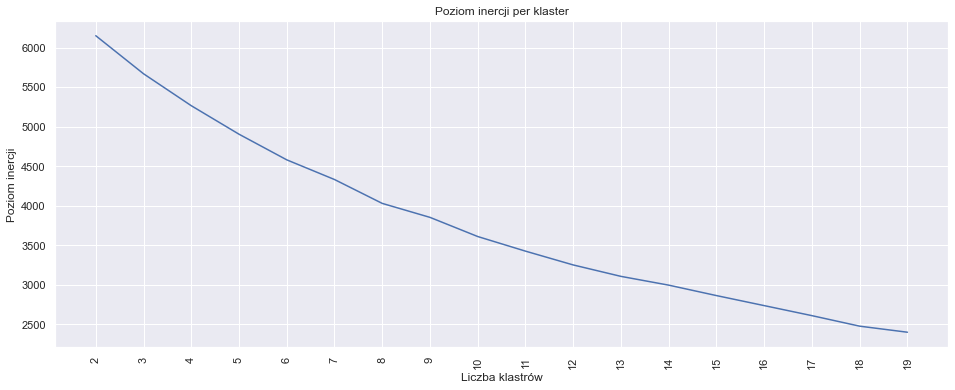

In [115]:
# Wykres inercji
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Liczba klastrów')
plt.ylabel('Poziom inercji')
plt.title("Poziom inercji per klaster")

Zbudujmy wykres i zobaczmy gdzie wykres zaczyna spowalniac.U nas dokladnie widac ze miedzy klastrem 3 a 4 zaczyna bo spadek to juz nie jedna kratka ale czesc.
Wiec chyba 3 klastry to najlepsza liczba dla nas.

In [116]:
#K means dla 3 klastrów

kmeans = KMeans(n_clusters=3, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "przewidywania" dla nowych danych
predictions = kmeans.predict(X_train)

# obliczanie liczebności klastra
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,3)

# Tworzenie wykresu pokazujacego jak ukladaja sie klastry
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# wyswtetenie wykresu
countscldf

,Cluster 0,Cluster 1,Cluster 2
0,416,327,75


<h2>PCA(Principal Component Analysis)-Czyli po co wszystko liczyc jescze raz skoro juz mamy dobrą liczbe klstrów?

<h3>Co to jest?<h3>

PCA to technika redukcji wymiarowości, która przekształca pewną liczbę potencjalnie skorelowanych zmiennych w mniejszą liczbę zmiennych nieskorelowanych, zwanych składowymi głównymi.

<h3>Po co ?<h3>

Celem PCA jest wyodrębnienie najważniejszych informacji z tabeli danych poprzez zmniejszenie rozmiaru zbioru danych i zachowanie tylko ważnych informacji.



<h3>Dodatkowe informacje<h3>


Pierwsza składowa główna musi mieć największą możliwą inercje(bezwładność), a zatem ta składowa będzie wyjaśniać największą część bezwładności/wariancji tabeli danych. Dlatego im mniej jest składowych głównych, tym mniejsza będzie bezwładność po PCA.

Z a każdą dodaną nową składową bezwładność będzie wzrastać, ponieważ rotacje są zawsze wykonywane w podprzestrzeni i nowe osie zawsze będą wyjaśniać mniejszą bezwładność niż oryginalne składowe, które są obliczane jako optymalne.
Dlatego inercja nie powinna być kryterium wyboru optymalnej liczby składowych głównych, ponieważ im mniejsza liczba składowych, tym mniejsza będzie inercja.
Kryterium wyboru liczby składowych głównych powinno być 95% inercji.

In [117]:
new_raw_data.shape

(818, 65)

Chcemy uruchomic PCA by zredukowac liczbe kolumn tylko do tych,ktore maja najwazniejsza wartosc informacyjna.

Co ja robie tu ponizej?<br>
1.Importuje PCA z pakietu sklearn<br>
2.jako x oznacza moje X_train co jest wszystkimi danymi<br>
3.Jako y oznaczam "labels of our clasters"czyli liczbe osob w danym klastrze co wyniklo z poprzednich obliczen<br>
4.Zapisujemy nazwy maszyhc klastrow w item_names<br>
5.Inicjujemy model pca<br>
6.inicjalizuje pca,n_components=2 bo jest x i y,random_state biore ten sam co poprzednio.<br>
7.Linijka X_r=>bierzemy X_train i transdormujemy je do postaci z jedynie 2 kolumnami.<br>
8.Wyesiwetlam wartosc wariancji dla x i y<br>
9.Ribue wykres bazuja na zmiennej X_r,

Explained variance ratio (first two components): [0.124025 0.094882]


<Figure size 576x432 with 0 Axes>

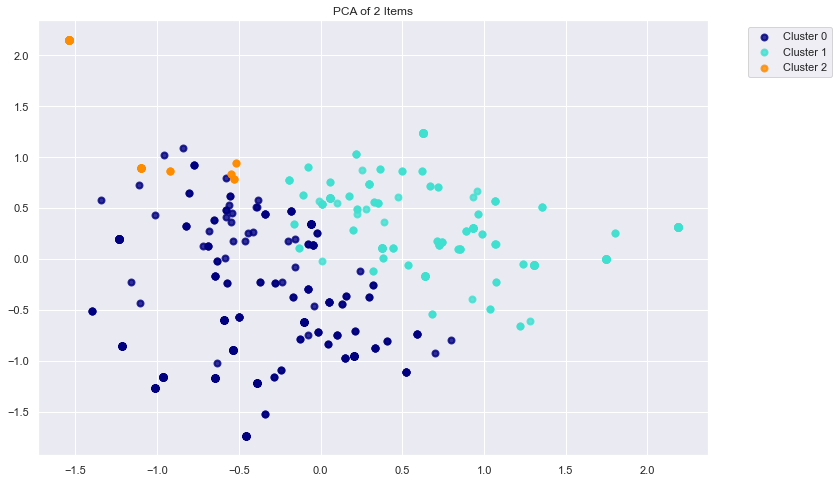

In [118]:
# Uruchomienie PCA w celu wizualizacji danych

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Procent wariancji wyjaśnionej dla każdej składowej
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Wykresy
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

Widzimy wiec ze pierwsze 2 komponenty wyjasniaja az ponad 20% wariancji w naszym datasecie.Widzymy tez ze chyba dobrze podzielilismy dataset na trzy klastry.

<h3>Dlaczego redukcja wymiarowości może poprawić wydajność metody k-średnich:<h3>



Kmeans jest bardzo wrażliwy na skalę, a przy dużej liczbie atrybutów nie ma już prawdziwej skali. W tym miejscu z pomocą przychodzi PCA, która wybiela dane.
W ten sposób usuwa się korelację globalną, co czasami może dać lepsze wyniki. K-średnich jest problemem optymalizacyjnym typu "najmniejszych kwadratów", podobnie jak PCA.
Kmeans próbuje znaleźć najmniejszy kwadratowy podział danych, natomiast PCA znajduje najmniejszy kwadratowy wektor przynależności do klastra. Pierwszy wektor własny ma największą wariancję (najmniejszą bezwładność), dlatego podział na tym wektorze (który pokazuje przynależność do klastra - a nie współrzędne danych wejściowych) oznacza maksymalizację wariancji klastra; lepiej pasuje do Kmeans.
Maksymalizując wariancję między klastrami, minimalizuje się wariancję wewnątrz klastra. Dlatego zastosowanie PCA przed klasteryzacją może potencjalnie pomóc w uzyskaniu lepszych klastrów (o większej wariancji) w Kmeans.

Wiec celem PCA jest zminimalizowanie wariancji
w klastrach poniewaz w cudzyslowie"odpychamy" klastry od siebie.

<h3>Wiec jak w koncu wybrac najlepsza liczbe klastrow?<h3>

Musze dojsc do mementu w ktorym jest wyjasniane 95% wariancji mojego modelu. W tym calu licze wariacje w calym modlu a potem wyznaczam 
zmienne var_95 mnozac total wariacje raz 0,95.



Total Variance in our dataset is:  8.249092481587782
The 95% variance we want to have is:  7.836637857508393

Variance explain with 20 n_compononets:  7.166123821352411
Variance explain with 25 n_compononets:  7.548434154379123
Variance explain with 26 n_compononets:  7.607486608633913
Variance explain with 27 n_compononets:  7.66173611054857
Variance explain with 28 n_compononets:  7.713643126721109
Variance explain with 29 n_compononets:  7.759992810218312
Variance explain with 30 n_compononets:  7.804215975363091
Variance explain with 31 n_compononets:  7.844953975950833


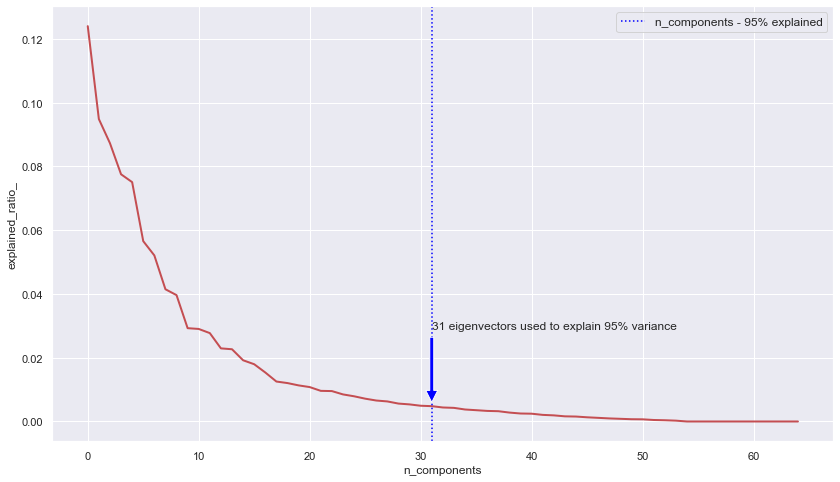

In [121]:
# Próba z redukcją wymiarowości, a następnie zastosowanie Kmeans

n_components = X.shape[1]


pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Obliczanie wariancji 95%
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Tworzenie df z komponentami i wariancją wyjaśnioną
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Próba trafienia w 95%
print("Variance explain with 20 n_compononets: ", sum(a["Explained Variance"][0:20]))
print("Variance explain with 25 n_compononets: ", sum(a["Explained Variance"][0:25]))
print("Variance explain with 26 n_compononets: ", sum(a["Explained Variance"][0:26]))
print("Variance explain with 27 n_compononets: ", sum(a["Explained Variance"][0:27]))
print("Variance explain with 28 n_compononets: ", sum(a["Explained Variance"][0:28]))
print("Variance explain with 29 n_compononets: ", sum(a["Explained Variance"][0:29]))
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 31 n_compononets: ", sum(a["Explained Variance"][0:31]))

#Wykresy
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Wykreślenie linii 95% wariancji
plt.axvline(31,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('31 eigenvectors used to explain 95% variance', xy=(31, pca.explained_variance_ratio_[31]), 
             xytext=(31, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

Podsumowanie:
    Widzimy ze calokowita wariancja w naszym datasecie to bedzie 9,84 zas 95% z niej to 9,35.Twoirze data rame a gdzie zapisuje ta wariancje.
    NAstepnie chce zobaczyc w kjtorej dokladnie zmiennej nasz model "przekracza"taka wariancje.Widximy ze w komponencie nr 28 zostaje przekroczona wariancja 9,35.
    
Nastepnie  tworze wykres pogladowy ktory pokazuje nam jaka wariancje wyjasnia kazdy z kolejnych komponentow oraz linie posta ktora mowi ile wynosi 95% wariancji calkowitej wyjasnianej przez model. Widzimy ze jest to okolo 30 wartosci, dokladnie w..28.
I tak oto wlasnie ustalilismy ze nalezy nasz model obcicac do 28 kolumn.
    

<h2>Uruchamiam wiec PCA  i kmeans uzywajac tym razem 53 komponetow i widze co sie dzieje <h2>

The innertia for : 2 Clusters is: 5794.256527715441
The innertia for : 3 Clusters is: 5305.173316117289
The innertia for : 4 Clusters is: 4916.326213646297
The innertia for : 5 Clusters is: 4563.783696882074
The innertia for : 6 Clusters is: 4247.558609988689
The innertia for : 7 Clusters is: 3981.237681365755
The innertia for : 8 Clusters is: 3740.1942419922993
The innertia for : 9 Clusters is: 3457.2918079604174
The innertia for : 10 Clusters is: 3293.5245091626675
The innertia for : 11 Clusters is: 3135.1440992441453
The innertia for : 12 Clusters is: 2924.2278205363996
The innertia for : 13 Clusters is: 2812.9929614399334
The innertia for : 14 Clusters is: 2694.4783252179086
The innertia for : 15 Clusters is: 2496.260536741329
The innertia for : 16 Clusters is: 2383.2663965662364
The innertia for : 17 Clusters is: 2293.5447442014024
The innertia for : 18 Clusters is: 2173.3007226101367
The innertia for : 19 Clusters is: 2065.917187542011


Text(0.5, 1.0, 'Inertia Plot per k')

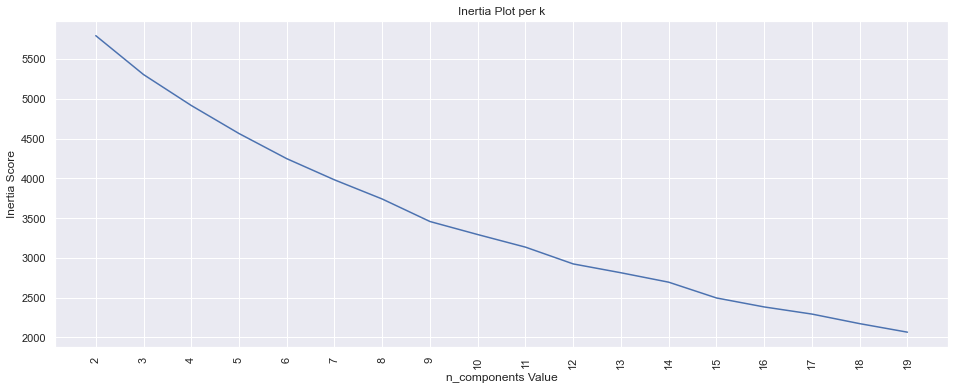

In [122]:
# Ponowne uruchomienie PCA

pca = PCA(n_components=31, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#Uruchamianie Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Wykres inercji
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

Teraz widzimy ze w klastrze 5 mamy duzo nizsza inercje niz przed PCA kiedy tez pokazywalismy ten wykres 6200/5834.Wiec sukces!Zdolalismy 
poprawic nasz rezultat obnizajac inercje!Hura!Teraz mozemy przejsc do poakzania wynikow biznesowi.

<h2>No dobrze al;e czy jest jakiś sposób zeby jescze bardzien poprawic nasz wynik?TAK!<h2>

Oczywiscie,musimy w tym celu przyjrzec sie naszym danym i troche je podzielic
1.Sprojrzmy an dane dotyczace czestotliowsci rocznej uczesczania na eventy.Widac dokladnie ze mozna podzilic te osoby zamiast 5 grup na dwie
-te ktore chodzily 4-5 razy i te ktore chodzily 1-3 razy poniewaz miedzy tymi grupami widac znaczna roznice.

2.Kolumna Scoail Media:podzial na <pol dnia i >pol dnia
I tak dalej-mozna latwo przeledzic ponizszy kod w ktorym wszystko jest opisane :)

In [123]:
new_raw_data.columns

Index(['Przedzial_wiekowy_18-30', 'Przedzial_wiekowy_30-40',
       'Przedzial_wiekowy_41-50', 'Przedzial_wiekowy_51-60',
       'Przedzial_wiekowy_61-70', 'Przedzial_wiekowy_70 lub wiecej',
       'Plec_Kobieta', 'Plec_Mezczyzna', 'Status_zwiazku_Rozwiedziona/y',
       'Status_zwiazku_Singiel/ka', 'Status_zwiazku_W zwiazku partnerskim',
       'Status_zwiazku_Wdowa/wiec', 'Status_zwiazku_Zamezna/zonaty bez dzieci',
       'Status_zwiazku_Zamezna/zonaty z dziecmi',
       'Roczne_dochody _w_zlotowkach _20000-35999,999',
       'Roczne_dochody _w_zlotowkach _36000-49999,999',
       'Roczne_dochody _w_zlotowkach _50000-74999,999',
       'Roczne_dochody _w_zlotowkach _<20000',
       'Roczne_dochody _w_zlotowkach _>100000',
       'Akceptowalna_dlugosc_podrozy_1 godzine',
       'Akceptowalna_dlugosc_podrozy_2 godziny',
       'Akceptowalna_dlugosc_podrozy_3 godziny',
       'Akceptowalna_dlugosc_podrozy_4 godziny i wiecej',
       'Akceptowalna_dlugosc_podrozy_mniej niz godzine',
    

In [124]:
new_raw_data['Zainteresowanie_zagadnieniami_uprawy_kukurydzy_w wiekszosci tak']

#new_raw_data2 = new_raw_data.T.drop_duplicates().T
#new_raw_data2['Zainteresowanie zagadnieniami uprawy kukurydzy_raczej tak']

0      0
1      0
2      0
3      0
4      0
      ..
813    0
814    0
815    0
816    0
817    0
Name: Zainteresowanie_zagadnieniami_uprawy_kukurydzy_w wiekszosci tak, Length: 818, dtype: uint8

In [125]:
# Cleaning the "Liczba odwiedzin swieta kukurydzy" column

# 1-2 razy
new_raw_data['Liczba odwiedzin swieta kukurydzy_1_lub_2_razy'] = 0
new_raw_data['Liczba odwiedzin swieta kukurydzy_1_lub_2_razy'][(new_raw_data['Liczba_odwiedzin_swieta_kukurydzy_1 raz'] == 1) |(new_raw_data['Liczba_odwiedzin_swieta_kukurydzy_2 razy'] == 1)] = 1

# 4-5 razy
new_raw_data['Liczba odwiedzin swieta kukurydzy_4_lub_5_razy'] = 0
new_raw_data['Liczba odwiedzin swieta kukurydzy_4_lub_5_razy'][(new_raw_data['Liczba_odwiedzin_swieta_kukurydzy_4 razy'] == 1) | (new_raw_data['Liczba_odwiedzin_swieta_kukurydzy_5 razy lub wiecej'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)

The shape is:  (818, 67)


C:\Users\weron\AppData\Local\Temp/ipykernel_24800/4159856948.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['Liczba odwiedzin swieta kukurydzy_1_lub_2_razy'][(new_raw_data['Liczba_odwiedzin_swieta_kukurydzy_1 raz'] == 1) |(new_raw_data['Liczba_odwiedzin_swieta_kukurydzy_2 razy'] == 1)] = 1
C:\Users\weron\AppData\Local\Temp/ipykernel_24800/4159856948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['Liczba odwiedzin swieta kukurydzy_4_lub_5_razy'][(new_raw_data['Liczba_odwiedzin_swieta_kukurydzy_4 razy'] == 1) | (new_raw_data['Liczba_odwiedzin_swieta_kukurydzy_5 razy lub wiecej'] == 1)]

In [126]:
# Akceptowalna dlugosc podrozy
# 1 to 2 hours
new_raw_data['Akceptowalna dlugosc podrozy_do_1_godziny'] = 0
new_raw_data['Akceptowalna dlugosc podrozy_do_1_godziny'][(new_raw_data['Akceptowalna_dlugosc_podrozy_1 godzine'] == 1) | (new_raw_data['Akceptowalna_dlugosc_podrozy_mniej niz godzine'] == 1)] = 1


# 2 to 3 hours
new_raw_data['Akceptowalna dlugosc podrozy_2_lub_3_godziny'] = 0
new_raw_data['Akceptowalna dlugosc podrozy_2_lub_3_godziny'][(new_raw_data['Akceptowalna_dlugosc_podrozy_3 godziny'] == 1) | (new_raw_data['Akceptowalna_dlugosc_podrozy_2 godziny'] == 1)] = 1


print("The shape is: ", new_raw_data.shape)

The shape is:  (818, 69)


C:\Users\weron\AppData\Local\Temp/ipykernel_24800/4032304802.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['Akceptowalna dlugosc podrozy_do_1_godziny'][(new_raw_data['Akceptowalna_dlugosc_podrozy_1 godzine'] == 1) | (new_raw_data['Akceptowalna_dlugosc_podrozy_mniej niz godzine'] == 1)] = 1
C:\Users\weron\AppData\Local\Temp/ipykernel_24800/4032304802.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['Akceptowalna dlugosc podrozy_2_lub_3_godziny'][(new_raw_data['Akceptowalna_dlugosc_podrozy_3 godziny'] == 1) | (new_raw_data['Akceptowalna_dlugosc_podrozy_2 godziny'] == 1)] = 1


In [127]:
new_raw_data.columns

Index(['Przedzial_wiekowy_18-30', 'Przedzial_wiekowy_30-40',
       'Przedzial_wiekowy_41-50', 'Przedzial_wiekowy_51-60',
       'Przedzial_wiekowy_61-70', 'Przedzial_wiekowy_70 lub wiecej',
       'Plec_Kobieta', 'Plec_Mezczyzna', 'Status_zwiazku_Rozwiedziona/y',
       'Status_zwiazku_Singiel/ka', 'Status_zwiazku_W zwiazku partnerskim',
       'Status_zwiazku_Wdowa/wiec', 'Status_zwiazku_Zamezna/zonaty bez dzieci',
       'Status_zwiazku_Zamezna/zonaty z dziecmi',
       'Roczne_dochody _w_zlotowkach _20000-35999,999',
       'Roczne_dochody _w_zlotowkach _36000-49999,999',
       'Roczne_dochody _w_zlotowkach _50000-74999,999',
       'Roczne_dochody _w_zlotowkach _<20000',
       'Roczne_dochody _w_zlotowkach _>100000',
       'Akceptowalna_dlugosc_podrozy_1 godzine',
       'Akceptowalna_dlugosc_podrozy_2 godziny',
       'Akceptowalna_dlugosc_podrozy_3 godziny',
       'Akceptowalna_dlugosc_podrozy_4 godziny i wiecej',
       'Akceptowalna_dlugosc_podrozy_mniej niz godzine',
    

<h3>Usuwam niepotrzebne kolumny ktore dublowalyby informacje<h3>

In [128]:
# Zastapianie apostrofow z kolumn
new_raw_data.columns = new_raw_data.columns.str.replace("'","")

# Usuwanie duplikujacych sie kolumn
new_features = ['Przedzial_wiekowy_18-30', 'Przedzial_wiekowy_30-40',
       'Przedzial_wiekowy_41-50', 'Przedzial_wiekowy_51-60',
       'Przedzial_wiekowy_61-70', 'Przedzial_wiekowy_70 lub wiecej',
       'Plec_Kobieta', 'Plec_Mezczyzna', 'Status_zwiazku_Rozwiedziona/y',
       'Status_zwiazku_Singiel/ka', 'Status_zwiazku_W zwiazku partnerskim',
       'Status_zwiazku_Wdowa/wiec', 'Status_zwiazku_Zamezna/zonaty bez dzieci',
       'Status_zwiazku_Zamezna/zonaty z dziecmi',
       'Roczne_dochody _w_zlotowkach _20000-35999,999',
       'Roczne_dochody _w_zlotowkach _36000-49999,999',
       'Roczne_dochody _w_zlotowkach _50000-74999,999',
       'Roczne_dochody _w_zlotowkach _<20000',
       'Roczne_dochody _w_zlotowkach _>100000',
       #'Akceptowalna_dlugosc_podrozy_1 godzine',
       #'Akceptowalna_dlugosc_podrozy_2 godziny',
       #'Akceptowalna_dlugosc_podrozy_3 godziny',
       'Akceptowalna_dlugosc_podrozy_4 godziny i wiecej',
       #'Akceptowalna_dlugosc_podrozy_mniej niz godzine',
       'Zainteresowanie_zagadnieniami_uprawy_kukurydzy_jest mi to obojetne',
       'Zainteresowanie_zagadnieniami_uprawy_kukurydzy_raczej nie',
       'Zainteresowanie_zagadnieniami_uprawy_kukurydzy_raczej tak',
       'Zainteresowanie_zagadnieniami_uprawy_kukurydzy_w wiekszosci nie',
       'Zainteresowanie_zagadnieniami_uprawy_kukurydzy_w wiekszosci tak',
       'Zainteresowanie_zagadnieniami_uprawy_kukurydzy_zdecydowanie nie',
       'Zainteresowanie_zagadnieniami_uprawy_kukurydzy_zdecydowanie tak',
       'Ulubiona_atrakcja_z_ponizszych_coroczny pokaz plonów',
       'Ulubiona_atrakcja_z_ponizszych_degustacja swojskiej kielbasy',
       'Ulubiona_atrakcja_z_ponizszych_loteria fantowa',
       'Ulubiona_atrakcja_z_ponizszych_przejazd kombajnem',
       'Ulubiona_atrakcja_z_ponizszych_wesole miasteczko dla dzieci',
       'Ulubiona_atrakcja_z_ponizszych_wybory "gospodarza roku"',
       'Ulubiona_atrakcja_z_ponizszych_wystep gwiazdy disco polo',
       'Zadowolenie_z_ostatniego_festiwalu_jest mi to obojetne',
       'Zadowolenie_z_ostatniego_festiwalu_raczej nie',
       'Zadowolenie_z_ostatniego_festiwalu_raczej tak',
       'Zadowolenie_z_ostatniego_festiwalu_w wiekszosci nie',
       'Zadowolenie_z_ostatniego_festiwalu_w wiekszosci tak',
       'Zadowolenie_z_ostatniego_festiwalu_zdecydowanie nie',
       'Zadowolenie_z_ostatniego_festiwalu_zdecydowanie tak',
       'Czy_polecilbys_uczestnictwo_innym?_jest mi to obojetne',
       'Czy_polecilbys_uczestnictwo_innym?_raczej nie',
       'Czy_polecilbys_uczestnictwo_innym?_raczej tak',
       'Czy_polecilbys_uczestnictwo_innym?_w wiekszosci nie',
       'Czy_polecilbys_uczestnictwo_innym?_w wiekszosci tak',
       'Czy_polecilbys_uczestnictwo_innym?_zdecydowanie nie',
       'Czy_polecilbys_uczestnictwo_innym?_zdecydowanie tak',
       'Czy_pieniadze_byly _warte_wydania?_jest mi to obojetne',
       'Czy_pieniadze_byly _warte_wydania?_raczej nie',
       'Czy_pieniadze_byly _warte_wydania?_raczej tak',
       'Czy_pieniadze_byly _warte_wydania?_w wiekszosci nie',
       'Czy_pieniadze_byly _warte_wydania?_w wiekszosci tak',
       'Czy_pieniadze_byly _warte_wydania?_w wiekzosci nie',
       'Czy_pieniadze_byly _warte_wydania?_zdecydowanie nie',
       'Czy_pieniadze_byly _warte_wydania?_zdecydowanie tak',
       #'Liczba_odwiedzin_swieta_kukurydzy_1 raz',
       #'Liczba_odwiedzin_swieta_kukurydzy_2 razy',
       'Liczba_odwiedzin_swieta_kukurydzy_3 razy',
       #'Liczba_odwiedzin_swieta_kukurydzy_4 razy',
       #'Liczba_odwiedzin_swieta_kukurydzy_5 razy lub wiecej',
       'Liczba odwiedzin swieta kukurydzy_1_lub_2_razy',
       'Liczba odwiedzin swieta kukurydzy_4_lub_5_razy',
       'Akceptowalna dlugosc podrozy_do_1_godziny',
       'Akceptowalna dlugosc podrozy_2_lub_3_godziny']

In [129]:
new_raw_data[new_features]

,Przedzial_wiekowy_18-30,Przedzial_wiekowy_30-40,Przedzial_wiekowy_41-50,Przedzial_wiekowy_51-60,Przedzial_wiekowy_61-70,Przedzial_wiekowy_70 lub wiecej,Plec_Kobieta,Plec_Mezczyzna,Status_zwiazku_Rozwiedziona/y,Status_zwiazku_Singiel/ka,...,Czy_pieniadze_byly _warte_wydania?_w wiekszosci nie,Czy_pieniadze_byly _warte_wydania?_w wiekszosci tak,Czy_pieniadze_byly _warte_wydania?_w wiekzosci nie,Czy_pieniadze_byly _warte_wydania?_zdecydowanie nie,Czy_pieniadze_byly _warte_wydania?_zdecydowanie tak,Liczba_odwiedzin_swieta_kukurydzy_3 razy,Liczba odwiedzin swieta kukurydzy_1_lub_2_razy,Liczba odwiedzin swieta kukurydzy_4_lub_5_razy,Akceptowalna dlugosc podrozy_do_1_godziny,Akceptowalna dlugosc podrozy_2_lub_3_godziny
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,1,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0
814,1,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0
815,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
816,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0


<h3>Probuje puscic kmeans na tych danych<h3>

In [130]:
# Re - Uruchamianie metody Kmeans na "nowych" danych
X_train = new_raw_data[new_features].values
X_train

array([[1, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0]], dtype=int64)

The innertia for : 2 Clusters is: 5811.080109639696
The innertia for : 3 Clusters is: 5233.631055452485
The innertia for : 4 Clusters is: 4871.178468870792
The innertia for : 5 Clusters is: 4596.08386129528
The innertia for : 6 Clusters is: 4242.202006637161
The innertia for : 7 Clusters is: 3980.557316312329
The innertia for : 8 Clusters is: 3799.1866373664716
The innertia for : 9 Clusters is: 3563.3465891722294
The innertia for : 10 Clusters is: 3345.2253692521363
The innertia for : 11 Clusters is: 3172.5407457707447
The innertia for : 12 Clusters is: 3051.71639387821
The innertia for : 13 Clusters is: 2842.9436768369733
The innertia for : 14 Clusters is: 2772.0753131784036
The innertia for : 15 Clusters is: 2596.463717292486
The innertia for : 16 Clusters is: 2531.6795155905766
The innertia for : 17 Clusters is: 2425.915942533636
The innertia for : 18 Clusters is: 2293.8880520601037
The innertia for : 19 Clusters is: 2229.27144847588
The innertia for : 20 Clusters is: 2157.445250607

Text(0.5, 1.0, 'Inertia Plot per k')

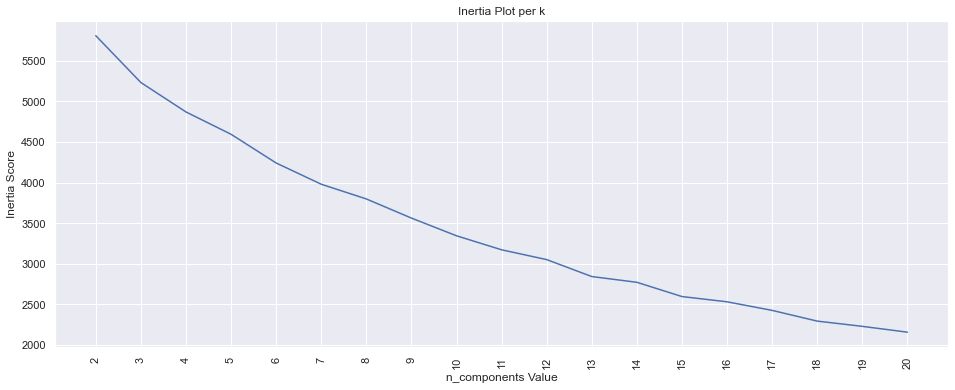

In [131]:

# K means

no_of_clusters = range(2,21) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

    
# Jescze raz wykres dla inercji
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

<h3>Konkluzja<h3>

Wnioski: Intertia poprawiła się w porównaniu z przebiegiem początkowym przed PCA i w porównaniu z przebiegiem PCA na poprzednich danych nawet - teraz chcemy zastosować PCA takze na tych nowych danych.Znowu zastosujemy 5 lastrow analogicznie jak poprzednio.

5669-przed PCA poprzednim razem.Teraz porze PCA-5233.Inercja sie obnizyla-sukces!

<h3>Znowu uruchamiamy PCA na danych po pogrupowaniu ich <h3>

Explained variance ratio (first two components): [0.136572 0.104695]


<Figure size 576x432 with 0 Axes>

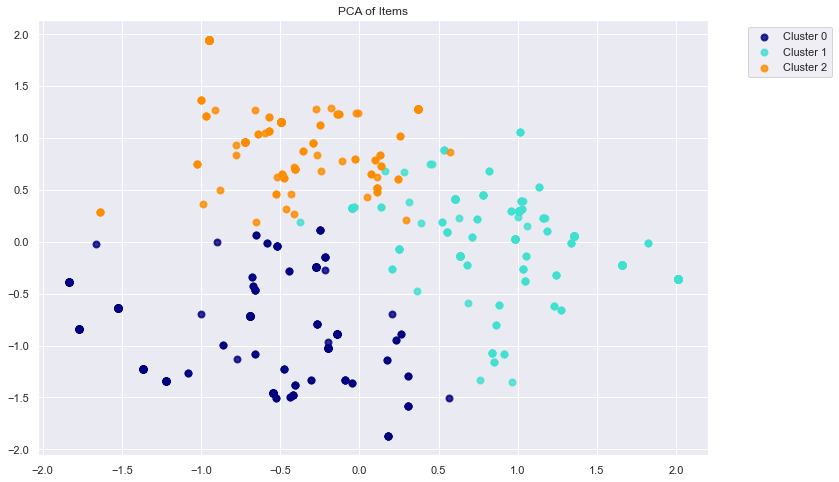

In [132]:


# Running K means on 3 clusters

kmeans = KMeans(n_clusters=3, random_state=2)
kmeans = kmeans.fit(X_train)

predictions = kmeans.predict(X_train)

# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of Items')
plt.show()

Teraz jest wieksza zbitosc, w kazdej klastrze i jednopczesnie widac jak klastry sa dalej od siebie polozone,bardziej klarowne.

Teraz tradycyjnie ustaloimy optymalna liczbę komponentow.

Total Variance in our dataset is:  7.8664952880865995
The 95% variance we want to have is:  7.473170523682269

Variance explain with 26 n_compononets:  7.3560079566462955
Variance explain with 27 n_compononets:  7.403289408862344
Variance explain with 28 n_compononets:  7.44876445704378
Variance explain with 29 n_compononets:  7.489782227444322
Variance explain with 24 n_compononets:  7.250323462294441
Variance explain with 25 n_compononets:  7.30644020142342
Variance explain with 26 n_compononets:  7.3560079566462955
Variance explain with 30 n_compononets:  7.528139038971374


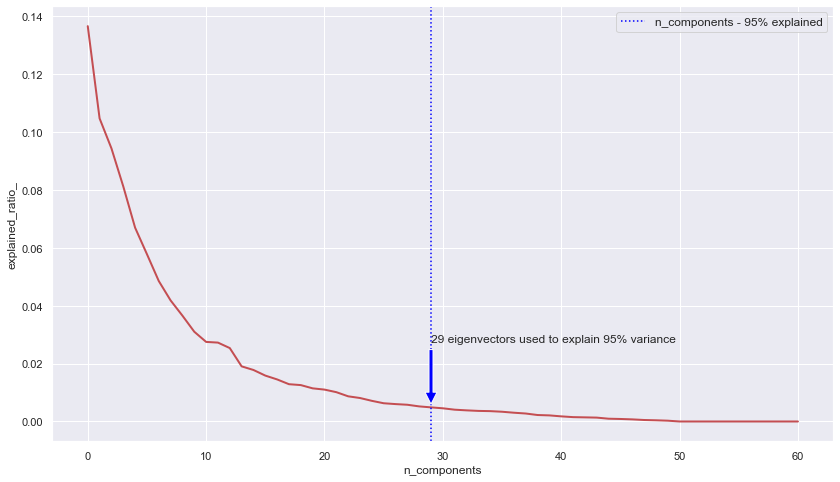

In [133]:
# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# PCA
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# 95% Wariancji
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Tworzenie df z komponentami i wariancją wyjaśnioną
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# 95% Wariancji
print("Variance explain with 26 n_compononets: ", sum(a["Explained Variance"][0:26]))
print("Variance explain with 27 n_compononets: ", sum(a["Explained Variance"][0:27]))
print("Variance explain with 28 n_compononets: ", sum(a["Explained Variance"][0:28]))
print("Variance explain with 29 n_compononets: ", sum(a["Explained Variance"][0:29]))
print("Variance explain with 24 n_compononets: ", sum(a["Explained Variance"][0:24]))
print("Variance explain with 25 n_compononets: ", sum(a["Explained Variance"][0:25]))
print("Variance explain with 26 n_compononets: ", sum(a["Explained Variance"][0:26]))
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))

# Wykres
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# 95% Wariancji
plt.axvline(29,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# dodanie strzalki
plt.annotate('29 eigenvectors used to explain 95% variance', xy=(29, pca.explained_variance_ratio_[29]), xytext=(29, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

Totalna wariancja zmalala,mamy tez  mniej kolumn(z 31 zeszlismy na 29) ktore spelniaja warunek 95% wariancji.To moze poprawic nasz wynik.

<h3>No i zapusczamy ostateczna wersje po ejscze wiekszej redukcji kolumn <h3>

The innertia for : 2 Clusters is: 5461.5611931018375
The innertia for : 3 Clusters is: 4978.725286452662
The innertia for : 4 Clusters is: 4595.03674544601
The innertia for : 5 Clusters is: 4276.567829306705
The innertia for : 6 Clusters is: 3985.4656875632954
The innertia for : 7 Clusters is: 3671.972404249735
The innertia for : 8 Clusters is: 3440.5173164026432
The innertia for : 9 Clusters is: 3273.229880732443
The innertia for : 10 Clusters is: 3057.7630667241324
The innertia for : 11 Clusters is: 2892.3008570854436
The innertia for : 12 Clusters is: 2646.1370194611222
The innertia for : 13 Clusters is: 2534.1615117438682
The innertia for : 14 Clusters is: 2441.0256752400396
The innertia for : 15 Clusters is: 2326.185442722854
The innertia for : 16 Clusters is: 2206.5074699740267
The innertia for : 17 Clusters is: 2132.8101701419464
The innertia for : 18 Clusters is: 2011.6817700871934
The innertia for : 19 Clusters is: 1936.348160916184
The innertia for : 20 Clusters is: 1830.1464

Text(0.5, 1.0, 'Inertia Plot per k')

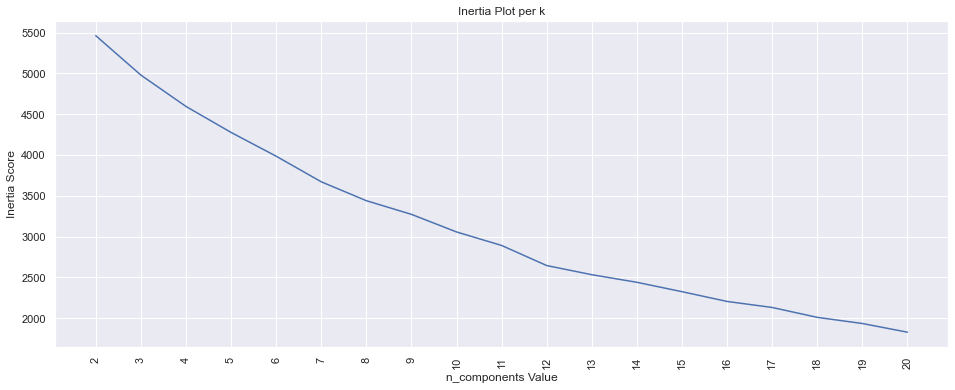

In [134]:
# PCA znowu

pca = PCA(n_components=29, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

# Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# wykres inercji
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

Wnioski: Udało nam się jeszcze bardziej poprawić nasze wyniki inercji:zeszlismy ponizej 5000 na 3 klastrach. o to wlasnie nam chodzilo!

Teraz mozemy spokojnie uruchomic  Kmeans z 3 klastrami by nastepnie uzyc  a PCA z  29 komponentami

In [135]:

# PCA z 29 komponentami
pca = PCA(n_components=29, random_state = 453)
X_r = pca.fit(X).transform(X)

# K means z 3 klastrami
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans = kmeans.fit(X_r)

clusters = kmeans.labels_

# Przyłącz klastry z powrotem do naszego początkowego zbioru danych, który zawiera wszystkie dane
df['Clusters'] = clusters

# Kategoria -klaster
df['Clusters Category'] = 'No Data'
df['Clusters Category'].loc[df['Clusters'] == 0] = 'Cluster 1'
df['Clusters Category'].loc[df['Clusters'] == 1] = 'Cluster 2'
df['Clusters Category'].loc[df['Clusters'] == 2] = 'Cluster 3'


df.head(5)

C:\Users\weron\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Przedzial_wiekowy,Plec,Status_zwiazku,Roczne_dochody _w_zlotowkach,Status_zawodowy,Rodzaj_pracy,Wyksztalcenie,Liczba_odwiedzin_swieta_kukurydzy,Akceptowalna_dlugosc_podrozy,Zainteresowanie_zagadnieniami_uprawy_kukurydzy,Zadowolenie_z_ostatniego_festiwalu,Czy_strefy_z_zywnoscia_wiejska_oraz_lokalnymi_nalewkami_sa_dla_ciebie_ciekawe?,Czy_polecilbys_uczestnictwo_innym?,Czy_pieniadze_byly _warte_wydania?,Ulubiona_atrakcja_z_ponizszych,Czy_jestes_rolnikiem?,Unnamed: 16,Clusters,Clusters Category
0,18-30,Kobieta,W zwiazku partnerskim,"50000-74999,999",pracownik pelnoetatowy,umyslowo,wyzsze,5 razy lub wiecej,1 godzine,jest mi to obojetne,zdecydowanie tak,zdecydowanie tak,zdecydowanie tak,zdecydowanie tak,wystep gwiazdy disco polo,nie,NaN,0,Cluster 1
1,18-30,Kobieta,Zamezna/zonaty z dziecmi,<20000,bezrobotny,fizycznie,zawodowe,5 razy lub wiecej,mniej niz godzine,zdecydowanie tak,zdecydowanie tak,raczej nie,zdecydowanie tak,w wiekszosci tak,wystep gwiazdy disco polo,tak,NaN,0,Cluster 1
2,61-70,Kobieta,Wdowa/wiec,<20000,emeryt,fizycznie,zawodowe,5 razy lub wiecej,mniej niz godzine,zdecydowanie tak,zdecydowanie tak,zdecydowanie tak,zdecydowanie tak,zdecydowanie tak,degustacja swojskiej kielbasy,tak,NaN,0,Cluster 1
3,30-40,Mezczyzna,W zwiazku partnerskim,>100000,pracownik pelnoetatowy,umyslowo,wyzsze,1 raz,2 godziny,jest mi to obojetne,w wiekszosci tak,zdecydowanie tak,w wiekszosci tak,raczej tak,przejazd kombajnem,nie,NaN,1,Cluster 2
4,30-40,Kobieta,W zwiazku partnerskim,>100000,pracownik pelnoetatowy,umyslowo,wyzsze,1 raz,1 godzine,zdecydowanie nie,raczej tak,raczej tak,raczej tak,w wiekszosci tak,coroczny pokaz plonów,nie,NaN,2,Cluster 3


In [136]:
df.columns

Index(['Przedzial_wiekowy', 'Plec', 'Status_zwiazku',
       'Roczne_dochody _w_zlotowkach ', 'Status_zawodowy', 'Rodzaj_pracy',
       'Wyksztalcenie', 'Liczba_odwiedzin_swieta_kukurydzy',
       'Akceptowalna_dlugosc_podrozy',
       'Zainteresowanie_zagadnieniami_uprawy_kukurydzy',
       'Zadowolenie_z_ostatniego_festiwalu',
       'Czy_strefy_z_zywnoscia_wiejska_oraz_lokalnymi_nalewkami_sa_dla_ciebie_ciekawe?',
       'Czy_polecilbys_uczestnictwo_innym?',
       'Czy_pieniadze_byly _warte_wydania?', 'Ulubiona_atrakcja_z_ponizszych',
       'Czy_jestes_rolnikiem?', 'Unnamed: 16', 'Clusters',
       'Clusters Category'],
      dtype='object')

<h3>czas na male uporzadkowanie kolumn by lepiej robilo mi sie koncowy raport<h3>

In [144]:
#Uporzadkowanie od najmniejszego do najwiekszego-zeby latwiej robilo sie raport w power BI

df['Roczne_dochody_w_zlotowkach__Kolejnosc'] = 0
df['Roczne_dochody_w_zlotowkach__Kolejnosc'].loc[df['Roczne_dochody _w_zlotowkach '] == '<20000'] = 1
df['Roczne_dochody_w_zlotowkach__Kolejnosc'].loc[df['Roczne_dochody _w_zlotowkach '] == '20000-35999,999'] = 2
df['Roczne_dochody_w_zlotowkach__Kolejnosc'].loc[df['Roczne_dochody _w_zlotowkach '] == '36000-49999,999'] = 3
df['Roczne_dochody_w_zlotowkach__Kolejnosc'].loc[df['Roczne_dochody _w_zlotowkach '] == '50000-74999,999'] = 4
df['Roczne_dochody_w_zlotowkach__Kolejnosc'].loc[df['Roczne_dochody _w_zlotowkach '] == '75000 to 99999,999'] = 5
df['Roczne_dochody_w_zlotowkach__Kolejnosc'].loc[df['Roczne_dochody _w_zlotowkach '] == '>100000'] = 6



df['Zainteresowanie_zagadnieniami_uprawy_kukurydzy Kolejnosc'] = 0
df['Zainteresowanie_zagadnieniami_uprawy_kukurydzy Kolejnosc'].loc[df['Zainteresowanie_zagadnieniami_uprawy_kukurydzy'] == 'zdecydowanie tak'] = 1
df['Zainteresowanie_zagadnieniami_uprawy_kukurydzy Kolejnosc'].loc[df['Zainteresowanie_zagadnieniami_uprawy_kukurydzy'] == 'w wiekszosci tak'] = 2
df['Zainteresowanie_zagadnieniami_uprawy_kukurydzy Kolejnosc'].loc[df['Zainteresowanie_zagadnieniami_uprawy_kukurydzy'] == 'raczej tak'] = 3
df['Zainteresowanie_zagadnieniami_uprawy_kukurydzy Kolejnosc'].loc[df['Zainteresowanie_zagadnieniami_uprawy_kukurydzy'] == 'jest mi to obojetne'] = 4
df['Zainteresowanie_zagadnieniami_uprawy_kukurydzy Kolejnosc'].loc[df['Zainteresowanie_zagadnieniami_uprawy_kukurydzy'] == 'raczej nie'] = 5
df['Zainteresowanie_zagadnieniami_uprawy_kukurydzy Kolejnosc'].loc[df['Zainteresowanie_zagadnieniami_uprawy_kukurydzy'] == 'w wiekszosci nie'] = 6
df['Zainteresowanie_zagadnieniami_uprawy_kukurydzy Kolejnosc'].loc[df['Zainteresowanie_zagadnieniami_uprawy_kukurydzy'] == 'zdecydowanie nie'] = 7


df['Czy_strefy_z_zywnoscia_wiejska_oraz_lokalnymi_nalewkami_sa_dla_ciebie_ciekawe?Kolejnosc'] = 0
df['Czy_strefy_z_zywnoscia_wiejska_oraz_lokalnymi_nalewkami_sa_dla_ciebie_ciekawe?Kolejnosc'].loc[df['Czy_strefy_z_zywnoscia_wiejska_oraz_lokalnymi_nalewkami_sa_dla_ciebie_ciekawe?'] == 'zdecydowanie tak'] = 1
df['Czy_strefy_z_zywnoscia_wiejska_oraz_lokalnymi_nalewkami_sa_dla_ciebie_ciekawe?Kolejnosc'].loc[df['Czy_strefy_z_zywnoscia_wiejska_oraz_lokalnymi_nalewkami_sa_dla_ciebie_ciekawe?'] == 'w wiekszosci tak'] = 2
df['Czy_strefy_z_zywnoscia_wiejska_oraz_lokalnymi_nalewkami_sa_dla_ciebie_ciekawe?Kolejnosc'].loc[df['Czy_strefy_z_zywnoscia_wiejska_oraz_lokalnymi_nalewkami_sa_dla_ciebie_ciekawe?'] == 'raczej tak'] = 3
df['Czy_strefy_z_zywnoscia_wiejska_oraz_lokalnymi_nalewkami_sa_dla_ciebie_ciekawe?Kolejnosc'].loc[df['Czy_strefy_z_zywnoscia_wiejska_oraz_lokalnymi_nalewkami_sa_dla_ciebie_ciekawe?'] == 'jest mi to obojetne'] = 4
df['Czy_strefy_z_zywnoscia_wiejska_oraz_lokalnymi_nalewkami_sa_dla_ciebie_ciekawe?Kolejnosc'].loc[df['Czy_strefy_z_zywnoscia_wiejska_oraz_lokalnymi_nalewkami_sa_dla_ciebie_ciekawe?'] == 'raczej nie'] = 5
df['Czy_strefy_z_zywnoscia_wiejska_oraz_lokalnymi_nalewkami_sa_dla_ciebie_ciekawe?Kolejnosc'].loc[df['Czy_strefy_z_zywnoscia_wiejska_oraz_lokalnymi_nalewkami_sa_dla_ciebie_ciekawe?'] == 'w wiekszosci nie'] = 6
df['Czy_strefy_z_zywnoscia_wiejska_oraz_lokalnymi_nalewkami_sa_dla_ciebie_ciekawe?Kolejnosc'].loc[df['Czy_strefy_z_zywnoscia_wiejska_oraz_lokalnymi_nalewkami_sa_dla_ciebie_ciekawe?'] == 'zdecydowanie nie'] = 7


df['Czy_pieniadze_byly _warte_wydania?Kolejnosc'] = 0
df['Czy_pieniadze_byly _warte_wydania?Kolejnosc'].loc[df['Czy_pieniadze_byly _warte_wydania?'] == 'zdecydowanie tak'] = 1
df['Czy_pieniadze_byly _warte_wydania?Kolejnosc'].loc[df['Czy_pieniadze_byly _warte_wydania?'] == 'w wiekszosci tak'] = 2
df['Czy_pieniadze_byly _warte_wydania?Kolejnosc'].loc[df['Czy_pieniadze_byly _warte_wydania?'] == 'raczej tak'] = 3
df['Czy_pieniadze_byly _warte_wydania?Kolejnosc'].loc[df['Czy_pieniadze_byly _warte_wydania?'] == 'jest mi to obojetne'] = 4
df['Czy_pieniadze_byly _warte_wydania?Kolejnosc'].loc[df['Czy_pieniadze_byly _warte_wydania?'] == 'raczej nie'] = 5
df['Czy_pieniadze_byly _warte_wydania?Kolejnosc'].loc[df['Czy_pieniadze_byly _warte_wydania?'] == 'w wiekszosci nie'] = 6
df['Czy_pieniadze_byly _warte_wydania?Kolejnosc'].loc[df['Czy_pieniadze_byly _warte_wydania?'] == 'zdecydowanie nie'] = 7


df['Czy_polecilbys_uczestnictwo_innym?Kolejnosc'] = 0
df['Czy_polecilbys_uczestnictwo_innym?Kolejnosc'].loc[df['Czy_polecilbys_uczestnictwo_innym?'] == 'zdecydowanie tak'] = 1
df['Czy_polecilbys_uczestnictwo_innym?Kolejnosc'].loc[df['Czy_polecilbys_uczestnictwo_innym?'] == 'w wiekszosci tak'] = 2
df['Czy_polecilbys_uczestnictwo_innym?Kolejnosc'].loc[df['Czy_polecilbys_uczestnictwo_innym?'] == 'raczej tak'] = 3
df['Czy_polecilbys_uczestnictwo_innym?Kolejnosc'].loc[df['Czy_polecilbys_uczestnictwo_innym?'] == 'jest mi to obojetne'] = 4
df['Czy_polecilbys_uczestnictwo_innym?Kolejnosc'].loc[df['Czy_polecilbys_uczestnictwo_innym?'] == 'raczej nie'] = 5
df['Czy_polecilbys_uczestnictwo_innym?Kolejnosc'].loc[df['Czy_polecilbys_uczestnictwo_innym?'] == 'w wiekszosci nie'] = 6
df['Czy_polecilbys_uczestnictwo_innym?Kolejnosc'].loc[df['Czy_polecilbys_uczestnictwo_innym?'] == 'zdecydowanie nie'] = 7



df['Liczba_odwiedzin_swieta_kukurydzy_Kolejnosc'] = 0
df['Liczba_odwiedzin_swieta_kukurydzy_Kolejnosc'].loc[df['Liczba_odwiedzin_swieta_kukurydzy'] == '1 raz'] = 1
df['Liczba_odwiedzin_swieta_kukurydzy_Kolejnosc'].loc[df['Liczba_odwiedzin_swieta_kukurydzy'] == '2 razy'] = 2
df['Liczba_odwiedzin_swieta_kukurydzy_Kolejnosc'].loc[df['Liczba_odwiedzin_swieta_kukurydzy'] == '3 razy'] = 3
df['Liczba_odwiedzin_swieta_kukurydzy_Kolejnosc'].loc[df['Liczba_odwiedzin_swieta_kukurydzy'] == '4 razy'] = 4
df['Liczba_odwiedzin_swieta_kukurydzy_Kolejnosc'].loc[df['Liczba_odwiedzin_swieta_kukurydzy'] == '5 razy lub wiecej'] = 5

###
df['Zadowolenie_z_ostatniego_festiwalu_Kolejnosc'] = 0
df['Zadowolenie_z_ostatniego_festiwalu_Kolejnosc'].loc[df['Zadowolenie_z_ostatniego_festiwalu'] == 'zdecydowanie tak'] = 1
df['Zadowolenie_z_ostatniego_festiwalu_Kolejnosc'].loc[df['Zadowolenie_z_ostatniego_festiwalu'] == 'w wiekszosci tak'] = 2
df['Zadowolenie_z_ostatniego_festiwalu_Kolejnosc'].loc[df['Zadowolenie_z_ostatniego_festiwalu'] == 'raczej tak'] = 3
df['Zadowolenie_z_ostatniego_festiwalu_Kolejnosc'].loc[df['Zadowolenie_z_ostatniego_festiwalu'] == 'jest mi to obojetne'] = 4
df['Zadowolenie_z_ostatniego_festiwalu_Kolejnosc'].loc[df['Zadowolenie_z_ostatniego_festiwalu'] == 'raczej nie'] = 5
df['Zadowolenie_z_ostatniego_festiwalu_Kolejnosc'].loc[df['Zadowolenie_z_ostatniego_festiwalu'] == 'w wiekszosci nie'] = 6
df['Zadowolenie_z_ostatniego_festiwalu_Kolejnosc'].loc[df['Zadowolenie_z_ostatniego_festiwalu'] == 'zdecydowanie nie'] = 7




df['Akceptowalna_dlugosc_podrozy_Kolejnosc'] = 0
df['Akceptowalna_dlugosc_podrozy_Kolejnosc'].loc[df['Akceptowalna_dlugosc_podrozy'] == 'mniej niz godzine'] = 1
df['Akceptowalna_dlugosc_podrozy_Kolejnosc'].loc[df['Akceptowalna_dlugosc_podrozy'] == '1 godzine'] = 2
df['Akceptowalna_dlugosc_podrozy_Kolejnosc'].loc[df['Akceptowalna_dlugosc_podrozy'] == '2 godziny'] = 3
df['Akceptowalna_dlugosc_podrozy_Kolejnosc'].loc[df['Akceptowalna_dlugosc_podrozy'] == '3 godziny'] = 4
df['Akceptowalna_dlugosc_podrozy_Kolejnosc'].loc[df['Akceptowalna_dlugosc_podrozy'] == '4 godziny i wiecej'] = 5


C:\Users\weron\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [145]:
df

,Przedzial_wiekowy,Plec,Status_zwiazku,Roczne_dochody _w_zlotowkach,Status_zawodowy,Rodzaj_pracy,Wyksztalcenie,Liczba_odwiedzin_swieta_kukurydzy,Akceptowalna_dlugosc_podrozy,Zainteresowanie_zagadnieniami_uprawy_kukurydzy,...,Clusters,Clusters Category,Roczne_dochody_w_zlotowkach__Kolejnosc,Zainteresowanie_zagadnieniami_uprawy_kukurydzy Kolejnosc,Czy_strefy_z_zywnoscia_wiejska_oraz_lokalnymi_nalewkami_sa_dla_ciebie_ciekawe?Kolejnosc,Czy_pieniadze_byly _warte_wydania?Kolejnosc,Czy_polecilbys_uczestnictwo_innym?Kolejnosc,Liczba_odwiedzin_swieta_kukurydzy_Kolejnosc,Zadowolenie_z_ostatniego_festiwalu_Kolejnosc,Akceptowalna_dlugosc_podrozy_Kolejnosc
0,18-30,Kobieta,W zwiazku partnerskim,"50000-74999,999",pracownik pelnoetatowy,umyslowo,wyzsze,5 razy lub wiecej,1 godzine,jest mi to obojetne,...,0,Cluster 1,4,4,1,1,1,5,1,2
1,18-30,Kobieta,Zamezna/zonaty z dziecmi,<20000,bezrobotny,fizycznie,zawodowe,5 razy lub wiecej,mniej niz godzine,zdecydowanie tak,...,0,Cluster 1,1,1,5,2,1,5,1,1
2,61-70,Kobieta,Wdowa/wiec,<20000,emeryt,fizycznie,zawodowe,5 razy lub wiecej,mniej niz godzine,zdecydowanie tak,...,0,Cluster 1,1,1,1,1,1,5,1,1
3,30-40,Mezczyzna,W zwiazku partnerskim,>100000,pracownik pelnoetatowy,umyslowo,wyzsze,1 raz,2 godziny,jest mi to obojetne,...,1,Cluster 2,6,4,1,3,2,1,2,3
4,30-40,Kobieta,W zwiazku partnerskim,>100000,pracownik pelnoetatowy,umyslowo,wyzsze,1 raz,1 godzine,zdecydowanie nie,...,2,Cluster 3,6,7,3,2,3,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,18-30,Kobieta,Singiel/ka,<20000,uczen,fizycznie,podstawowe,2 razy,1 godzine,raczej tak,...,0,Cluster 1,1,3,3,2,1,2,1,2
814,18-30,Mezczyzna,Singiel/ka,"36000-49999,999",pracownik pelnoetatowy,umyslowo,wyzsze,2 razy,1 godzine,zdecydowanie tak,...,0,Cluster 1,3,1,1,2,3,2,1,2
815,18-30,Kobieta,W zwiazku partnerskim,"20000-35999,999",pracownik pelnoetatowy,umyslowo,srednie,1 raz,mniej niz godzine,jest mi to obojetne,...,2,Cluster 3,2,4,1,3,4,1,3,1
816,30-40,Kobieta,W zwiazku partnerskim,"36000-49999,999",pracownik pelnoetatowy,umyslowo,zawodowe,2 razy,1 godzine,jest mi to obojetne,...,2,Cluster 3,3,4,1,1,3,2,1,2


Zrobilismy to zeby ladniej bylo pokazac skale na tabelkach pozniej 

In [146]:
df.to_csv('C:/Users/weron/OneDrive/Pulpit/Python finance/job_project/kmeans/Kukurydza_danefinalnee.csv')

Zapisuje i bede robic dasboard teraz